# 0 Import

In [1]:
import os
import pickle

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import scikitplot as skplt

import funcoes_suporte as fs
import feature_engenniring as fe
import data_preparation as dp

In [36]:
from sklearn.dummy import DummyClassifier
from sklearn import neighbors as nh
from sklearn import ensemble as en
from sklearn import tree as tr
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, brier_score_loss

## 0.1 Help Functions

In [3]:
fs.jupyter_settings(altura= 18, largura= 14, fonte= 11)
fs.supressao_notacao(casa_decimal = 5)

## 0.2 Load interim data

In [4]:
x_treino = pickle.load( open( "../data/processed/x_treino.pkl", "rb" ) )
y_treino = pickle.load( open( "../data/processed/y_treino.pkl", 'rb' ) )

x_teste = pickle.load( open( "../data/processed/x_teste.pkl", "rb" ) )
y_teste = pickle.load( open( "../data/processed/y_teste.pkl", 'rb' ) )

x_validacao = pickle.load( open( "../data/processed/x_validacao.pkl", "rb" ) )
y_validacao = pickle.load( open( "../data/processed/y_validacao.pkl", 'rb' ) )

## 0.3 Aplicando Data FE

In [5]:
x_teste['resposta'] = y_teste
x_teste = fe.fe(x_teste)

In [6]:
x_validacao['resposta'] = y_validacao
x_validacao = fe.fe(x_validacao)

## 0.4 Aplicando Data Preparation

In [7]:
x_teste = dp.data_prep(x_teste)

In [8]:
x_validacao = dp.data_prep(x_validacao)

## 0.5 Aplicando Feature Selection

In [9]:
cols_select = pickle.load(open( "../data/processed/cols_selected.pkl", "rb" ) )
cols_select.append('resposta')

In [10]:
x_teste = x_teste[cols_select]
x_validacao = x_validacao[cols_select]

del cols_select

## 0.6 Separando os dados novamente

In [11]:
x_teste = x_teste.dropna()
y_teste = x_teste['resposta']
x_teste = x_teste.drop(columns = ['resposta'])

In [12]:
x_validacao = x_validacao.dropna()
y_validacao = x_validacao['resposta']
x_validacao = x_validacao.drop(columns = ['resposta'])

# 1.0 Construção Modelos

# 1.1 Base Line

In [13]:
dummy = DummyClassifier()

## 1.2 KNN

In [14]:
knn_model = nh.KNeighborsClassifier( n_neighbors= 100)

## 1.3 Tree

In [15]:
tree_model = tr.DecisionTreeClassifier(max_depth=20)

## 1.4 Random Forest

In [16]:
rf_model = en.ExtraTreesClassifier( n_estimators=1000, n_jobs=-1, random_state=42)

## 1.5 Logistic Regression

In [37]:
lr_model = LogisticRegression()

# 2.0 Treinamento Modelos Treino x Teste

## 2.1 Base Line

In [17]:
dummy.fit(x_treino,y_treino)

y_proba = dummy.predict_proba(x_teste)

dummy_teste_log_loss = log_loss(y_teste, y_proba)
dummy_teste_brier_score_loss = brier_score_loss(y_teste, y_proba[:, 1])

print("Log Loss:", dummy_teste_log_loss)
print("Brier Score:", dummy_teste_brier_score_loss)

Log Loss: 0.3716802782102537
Brier Score: 0.10741838594716308


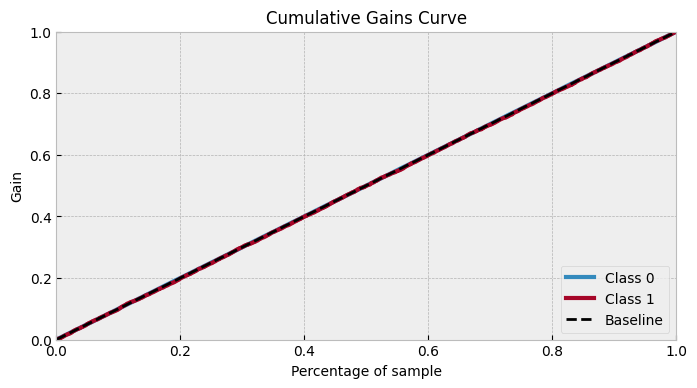

In [18]:
with plt.rc_context({'figure.figsize': (8, 4), 'font.size': 10}):
    skplt.metrics.plot_cumulative_gain(y_teste, y_proba)
    plt.show()

## 2.2 KNN

In [19]:
knn_model.fit( x_treino, y_treino )

y_proba_knn = knn_model.predict_proba(x_teste)

print("Log Loss:", log_loss(y_teste, y_proba_knn))
print("Brier Score:", brier_score_loss(y_teste, y_proba_knn[:, 1]))

Log Loss: 0.28026389098123305
Brier Score: 0.08824563106796116


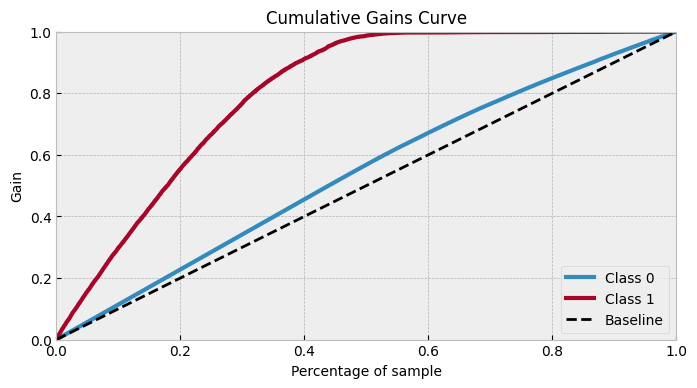

In [20]:
with plt.rc_context({'figure.figsize': (8, 4), 'font.size': 10}):
    skplt.metrics.plot_cumulative_gain(y_teste, y_proba_knn)
    plt.show()

## 2.3 Tree

In [21]:
tree_model.fit(x_treino, y_treino)

y_proba_tree = tree_model.predict_proba(x_teste)

print("Log Loss:", log_loss(y_teste, y_proba_tree))
print("Brier Score:", brier_score_loss(y_teste, y_proba_tree[:, 1]))

Log Loss: 1.8677123234493342
Brier Score: 0.1130709023050114


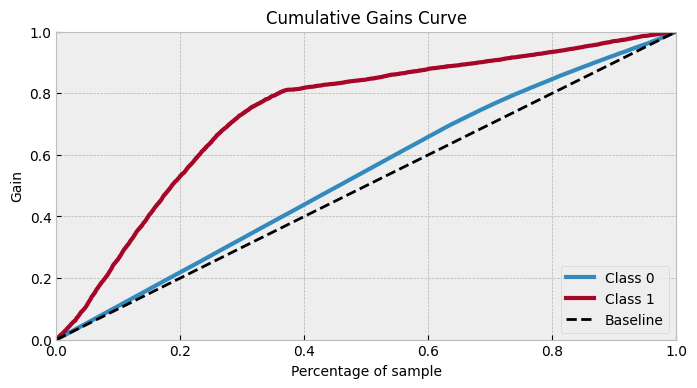

In [22]:
with plt.rc_context({'figure.figsize': (8, 4), 'font.size': 10}):
    skplt.metrics.plot_cumulative_gain(y_teste, y_proba_tree)
    plt.show()

## 2.4 Random Forest

In [23]:
rf_model.fit(x_treino, y_treino)

y_proba_rf = rf_model.predict_proba(x_teste)

print("Log Loss:", log_loss(y_teste, y_proba_rf))
print("Brier Score:", brier_score_loss(y_teste, y_proba_rf[:, 1]))

Log Loss: 0.3463813054799905
Brier Score: 0.09902127926227199


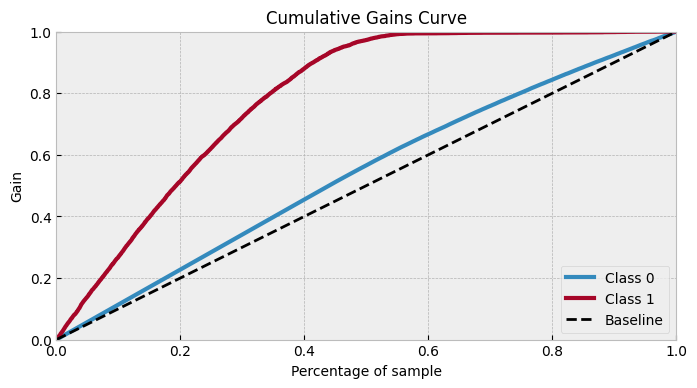

In [24]:
with plt.rc_context({'figure.figsize': (8, 4), 'font.size': 10}):
    skplt.metrics.plot_cumulative_gain(y_teste, y_proba_rf)
    plt.show()

## 2.4 Logistic Regression

In [40]:
lr_model.fit(x_treino, y_treino)

y_proba_lr = lr_model.predict_proba(x_teste)

print("Log Loss:", log_loss(y_teste, y_proba_lr))
print("Brier Score:", brier_score_loss(y_teste, y_proba_lr[:, 1]))

Log Loss: 0.27948884820425257
Brier Score: 0.09144690288194217


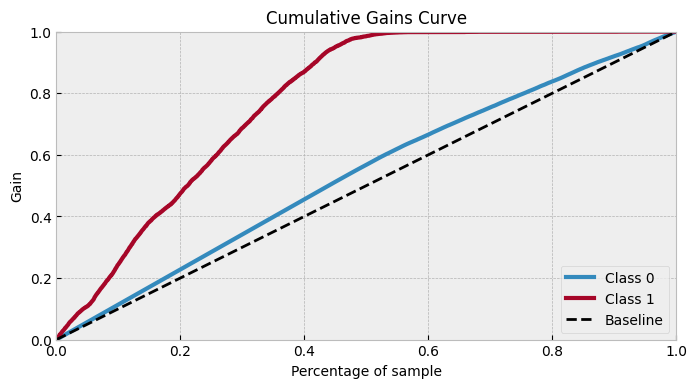

In [41]:
with plt.rc_context({'figure.figsize': (8, 4), 'font.size': 10}):
    skplt.metrics.plot_cumulative_gain(y_teste, y_proba_lr)
    plt.show()

# 3.0 (Treino + Teste) x Validação

## 3.1 Base Line

In [25]:
x_treino_teste = pd.concat([x_treino,x_teste])
y_treino_teste = pd.concat([y_treino,y_teste])

In [26]:
dummy.fit(x_treino_teste,y_treino_teste)

y_proba_2 = dummy.predict_proba(x_validacao)

print("Log Loss:", log_loss(y_validacao, y_proba_2))
print("Brier Score:", brier_score_loss(y_validacao, y_proba_2[:, 1]))

Log Loss: 0.3766525611056554
Brier Score: 0.1093236398642464


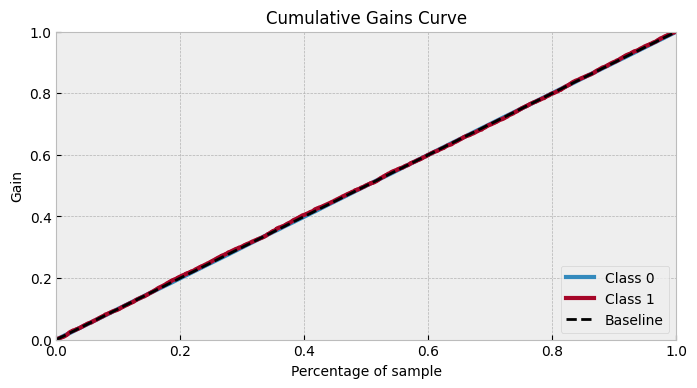

In [27]:
with plt.rc_context({'figure.figsize': (8, 4), 'font.size': 10}):
    skplt.metrics.plot_cumulative_gain(y_validacao, y_proba_2)
    plt.show()

## 3.2 KNN

In [28]:
knn_model.fit( x_treino_teste, y_treino_teste )

y_proba_knn_2 = knn_model.predict_proba(x_validacao)

print("Log Loss:", log_loss(y_validacao, y_proba_knn_2))
print("Brier Score:", brier_score_loss(y_validacao, y_proba_knn_2[:, 1]))

Log Loss: 0.28124639057068274
Brier Score: 0.08940623469316351


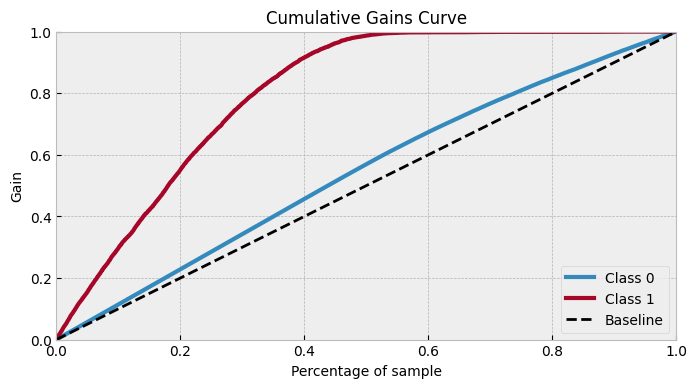

In [29]:
with plt.rc_context({'figure.figsize': (8, 4), 'font.size': 10}):
    skplt.metrics.plot_cumulative_gain(y_validacao, y_proba_knn_2)
    plt.show()

## 3.3 Tree

In [30]:
tree_model.fit(x_treino_teste, y_treino_teste)

y_proba_tree_2 = tree_model.predict_proba(x_validacao)

print("Log Loss:", log_loss(y_validacao, y_proba_tree_2))
print("Brier Score:", brier_score_loss(y_validacao, y_proba_tree_2[:, 1]))

Log Loss: 1.7592938089302814
Brier Score: 0.11291879977471764


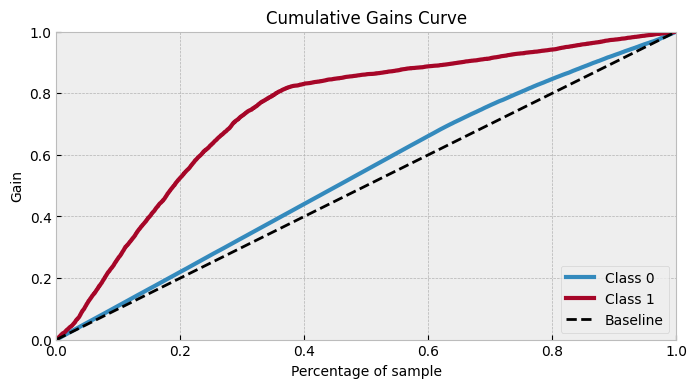

In [31]:
with plt.rc_context({'figure.figsize': (8, 4), 'font.size': 10}):
    skplt.metrics.plot_cumulative_gain(y_validacao, y_proba_tree_2)
    plt.show()

## 3.4 Random Forest

In [32]:
rf_model.fit(x_treino_teste, y_treino_teste)

y_proba_rf_2 = rf_model.predict_proba(x_validacao)

print("Log Loss: ", log_loss(y_validacao, y_proba_rf_2))
print("Brier Score: ", brier_score_loss(y_validacao, y_proba_rf_2[:,1]))

Log Loss:  0.34866750836468674
Brier Score:  0.10163597419024406


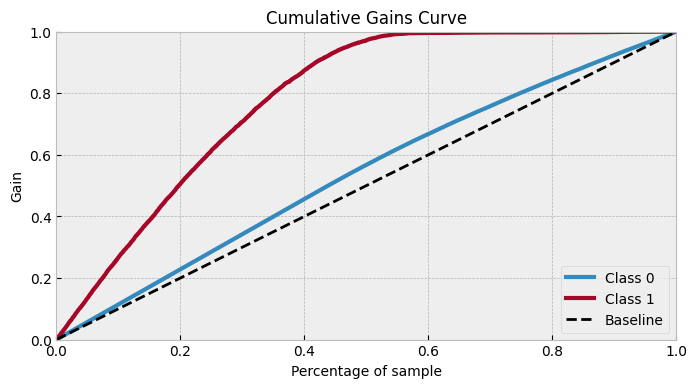

In [33]:
with plt.rc_context({'figure.figsize': (8, 4), 'font.size': 10}):
    skplt.metrics.plot_cumulative_gain(y_validacao, y_proba_rf_2)
    plt.show()

## 3.4 Logistic Regression

In [42]:
lr_model.fit(x_treino_teste, y_treino_teste)

y_proba_lr_2 = lr_model.predict_proba(x_validacao)

print("Log Loss: ", log_loss(y_validacao, y_proba_lr_2))
print("Brier Score: ", brier_score_loss(y_validacao, y_proba_lr_2[:,1]))

Log Loss:  0.2828024286973808
Brier Score:  0.09286530057354617


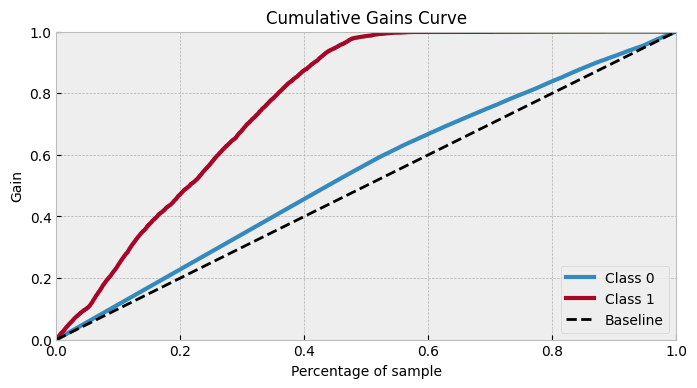

In [43]:
with plt.rc_context({'figure.figsize': (8, 4), 'font.size': 10}):
    skplt.metrics.plot_cumulative_gain(y_validacao, y_proba_lr_2)
    plt.show()

# 4.0 Modelo Final

In [44]:
pickle.dump(lr_model, open("../models/lr_model.pkl", "wb"))